# Importar las librerias

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Cargamos y visualizamos el conjunto de datos

In [2]:
# Leer el conjunto de datos desde el archivo Excel
dataset = pd.read_excel('Boston_Housing.xlsx')

In [3]:
# Imprimir las primeras filas del conjunto de datos
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


# Preparamos los datos

In [4]:
# Seleccionar las variables independientes (X) y la variable dependiente (y) 
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values   

# Dividimos el data set

In [5]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustar el modelo de regresion lineal

In [6]:
# Ajustar el modelo de regresion lineal con el conjunto de entrenamiento
r = LinearRegression()
r.fit(X_train, y_train)

LinearRegression()

# Predicción

In [7]:
# Predicción de los resultados en el conjunto de testing
y_pred = r.predict(X_test)

# Evaluacion del modelo

In [10]:
# Evaluamos el modelo con métricas MSE y R^2.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 33.44897999767661
Coeficiente de determinación (R^2): 0.5892223849182499


# Grafico de disperción 

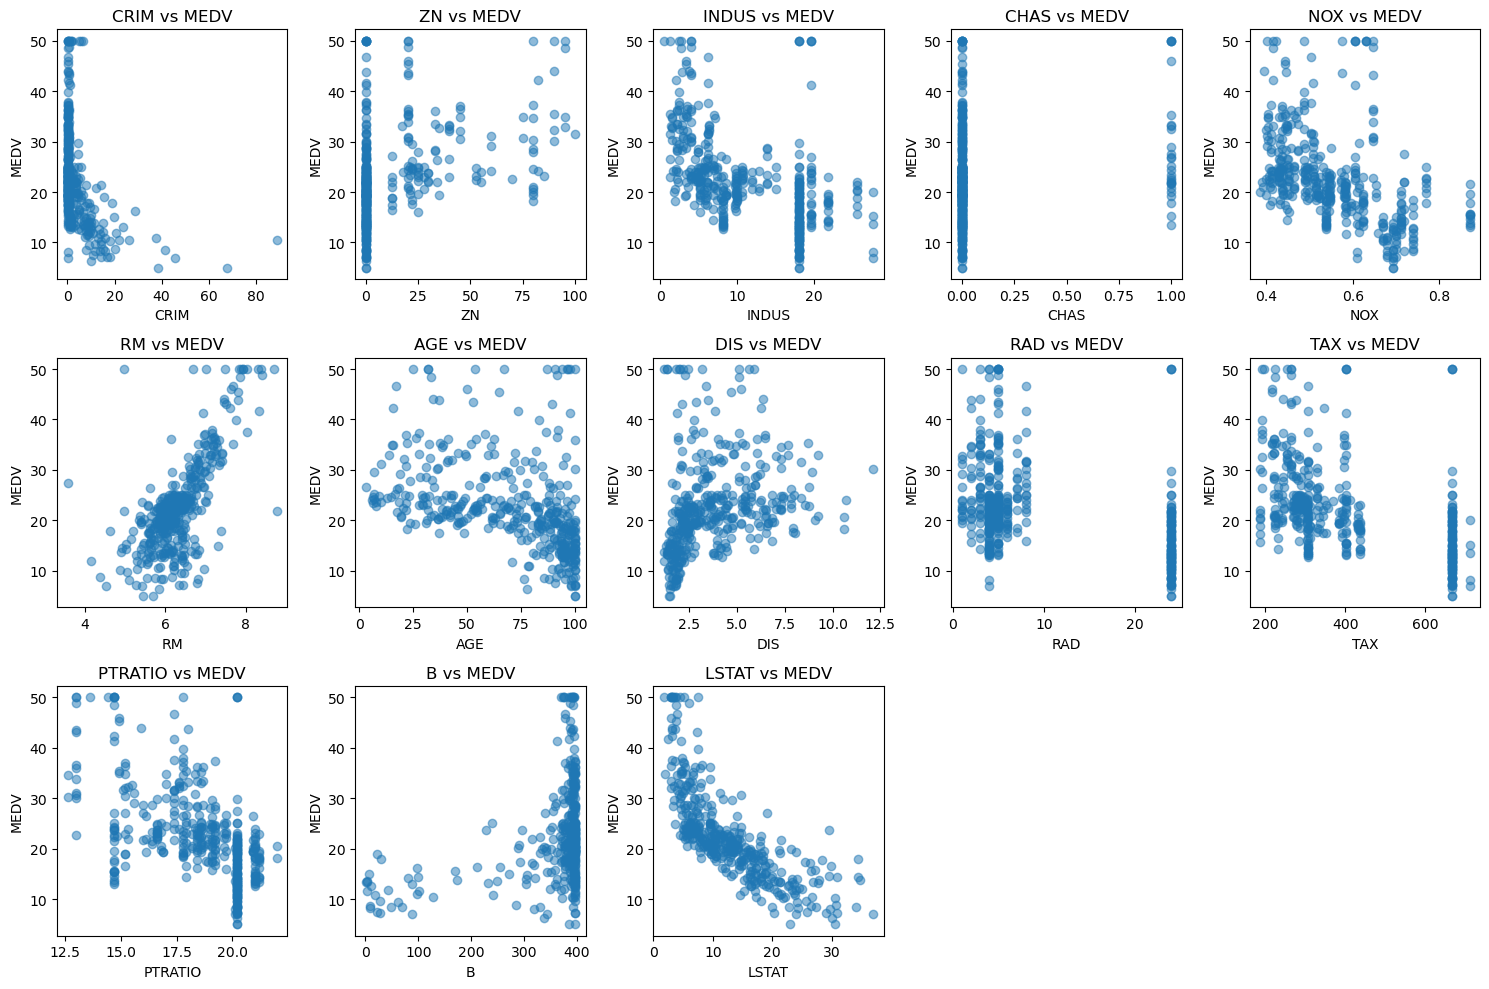

In [18]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según sea necesario

for i, col in enumerate(dataset.columns[:-1]):
    plt.subplot(3, 5, i + 1)  # Usa 3 filas y 5 columnas
    plt.scatter(X_train_dataframe[col], y_train, alpha=0.5)
    plt.title(f'{col} vs MEDV')
    plt.xlabel(col)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

# Visualización de los coeficientes

In [12]:
# Convertir el array de NumPy a un DataFrame de pandas
X_dataframe = pd.DataFrame(X, columns=dataset.columns[:-1])

# Visualización de los coeficientes
coefficients = pd.DataFrame(r.coef_, X_dataframe.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
CRIM       -0.119443
ZN          0.044780
INDUS       0.005485
CHAS        2.340804
NOX       -16.123604
RM          3.708709
AGE        -0.003121
DIS        -1.386397
RAD         0.244178
TAX        -0.010990
PTRATIO    -1.045921
B           0.008110
LSTAT      -0.492793


# Eliminacion hacia atrás

In [14]:
def backward_elimination(x, y, significance_level = 0.05):
    num_vars = len(x.columns)
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(y, x).fit()
        max_p_value = max(regressor_OLS.pvalues)
        feature_with_max_p = regressor_OLS.pvalues.idxmax()

        if max_p_value > significance_level:
            x = x.drop(feature_with_max_p, axis=1)
            print(f"Eliminando '{feature_with_max_p}' con p-valor {max_p_value}")

            # Volver a ajustar el modelo y verificar si el R-cuadrado ajustado ha mejorado
            regressor_OLS = sm.OLS(y, x).fit()
            print(f"Nuevo modelo R-cuadrado ajustado: {regressor_OLS.rsquared_adj}")
        else:
            print("No se eliminaron más variables.")
            print("Variables finales seleccionadas:", x.columns.tolist())
            break

    return x

# Convertir X_train a un DataFrame de pandas
X_train_dataframe = pd.DataFrame(X_train, columns=dataset.columns[:-1])

# Aplicar la función de eliminación hacia atrás
X_Modeled = backward_elimination(X_train_dataframe, y_train)

Eliminando 'NOX' con p-valor 0.9628781350231792
Nuevo modelo R-cuadrado ajustado: 0.9625309115949467
Eliminando 'INDUS' con p-valor 0.7138711934470303
Nuevo modelo R-cuadrado ajustado: 0.9626134164601355
Eliminando 'AGE' con p-valor 0.39477723069476645
Nuevo modelo R-cuadrado ajustado: 0.9626394382834221
Eliminando 'RAD' con p-valor 0.07770105321637204
Nuevo modelo R-cuadrado ajustado: 0.962438102662708
No se eliminaron más variables.
Variables finales seleccionadas: ['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']


# Historigrama

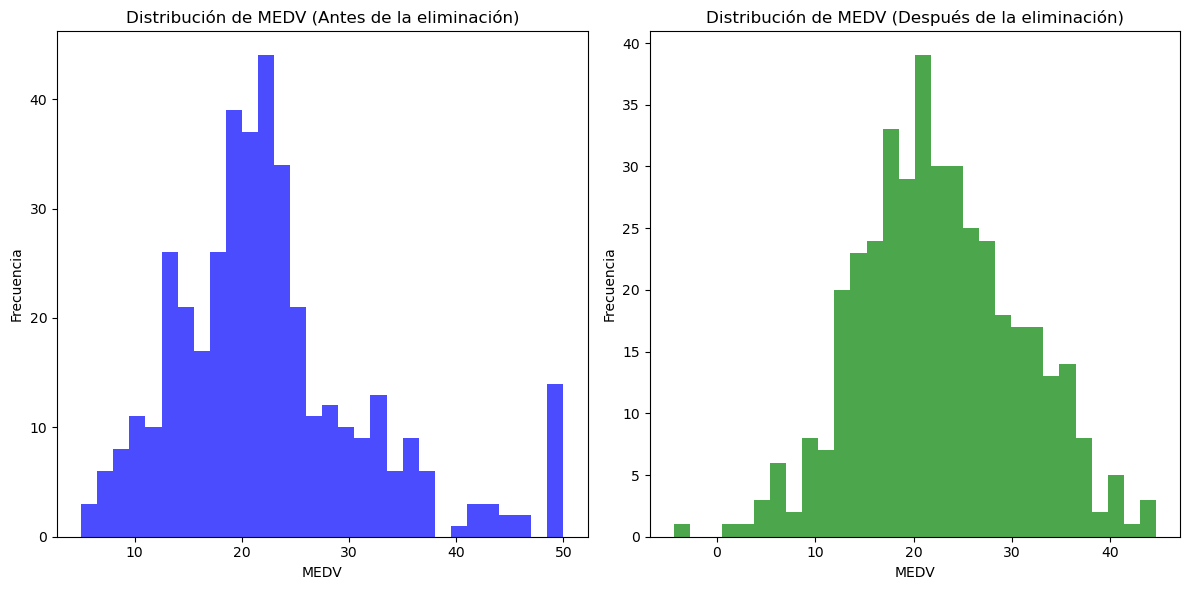

In [19]:
# Antes de la eliminación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Distribución de MEDV (Antes de la eliminación)')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')

# Después de la eliminación
plt.subplot(1, 2, 2)
plt.hist(r.predict(X_train), bins=30, color='green', alpha=0.7)
plt.title('Distribución de MEDV (Después de la eliminación)')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()